## Build a Bear Workshops vs the Tech Industry

While scrolling on social media recently, I came across a post with a surprising assertion. Build a Bear Workshop Inc. massively outperforms leading tech and AI companies in the S&P 500, including giants such as Nvidia and Palantir.

This project aims to examine the accuracy of that statement and explore the underlying factors that may explain such performance.

Analyzing this companies success will be done through 3 methods:

- Comparing Build a Bear's stock growth percentage to major tech and AI companies
- 2
- 3

-----

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import yfinance as yf
import numpy as np
from pytrends.request import TrendReq

The companies that will be used in the initial analysis in comparison to Build a Bear are tech & AI giants **Nvidia, Palantir, Meta, Alphabet, and Microsoft.**

- **Nvidia** and **Palantir** are fast growing stocks that have soared astronmically as a result of AI hype.
- In comparison, **Microsoft**, **Meta**, and **Alphabet** are all well established in the tech industry. 

These two groups are included to make a distinction between rapidly growing firms and established giants.

In [2]:
tickers = ['BBW', 'PLTR','NVDA', 'META', 'GOOG', 'MSFT']

# 5 years of closing data for each ticker, start date is the most accessible date after palantir's ipo in late September 2020
stock_data = yf.download(tickers, start= "2020-10-05", end = None, auto_adjust= True)["Close"] 
clean_data = stock_data.dropna() # remove empty tables

[*********************100%***********************]  6 of 6 completed


### Normalizing and Visualizing Stock Prices 
Obviously, the price of Build a Bear stock is not comparable to the stock of Microsoft. To account for this, we need to normalize each stock so that they all start at a baseline of 100 on the same start date. 

This sets a reference point to compare and visualize relative performance. 

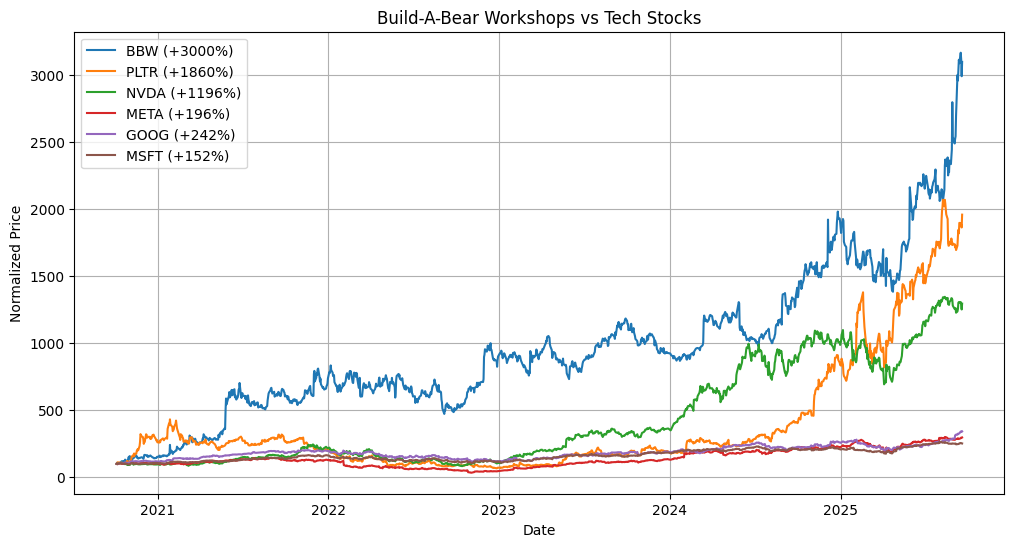

In [3]:
normalized = (clean_data/ clean_data.iloc[0]) * 100 # Explanation
returns = (clean_data.iloc[-1] / clean_data.iloc[0] - 1) * 100 # Explanation

plt.figure(figsize=(12,6))

for ticker in tickers:
   plt.plot(normalized[ticker], label = f"{ticker} ({returns[ticker]:+.0f}%)")

plt.title("Build-A-Bear Workshops vs Tech Stocks")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

This shows an astronomical **2893%** growth, and while this number is accurate, closer analysis is needed to understand the big picture. 

### Summary Data:

In [4]:
summary_data = {
    'Starting': [f"${clean_data[ticker].iloc[0]:.2f}" for ticker in tickers],
    'Ending': [f"${clean_data[ticker].iloc[-1]:.2f}" for ticker in tickers],
    'Return %': [f"{returns[ticker]:+.1f}%" for ticker in tickers]}

summary_df = pd.DataFrame(summary_data, index = tickers)
print("October 5th 2020 - September 18th 2025\n")
print(summary_df)

October 5th 2020 - September 18th 2025

     Starting   Ending  Return %
BBW     $2.39   $74.21  +2999.8%
PLTR    $9.03  $176.97  +1859.8%
NVDA   $13.60  $176.24  +1195.8%
META  $263.21  $780.25   +196.4%
GOOG   $73.80  $252.33   +241.9%
MSFT  $201.72  $508.45   +152.1%


---
### header
a section that shows its long term stock price, then go into reasons why this growth is more than just recovery.


In [5]:
bbw_data = yf.download('BBW', start= "2015-01-01", end = None, auto_adjust= True)["Close"] 

[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

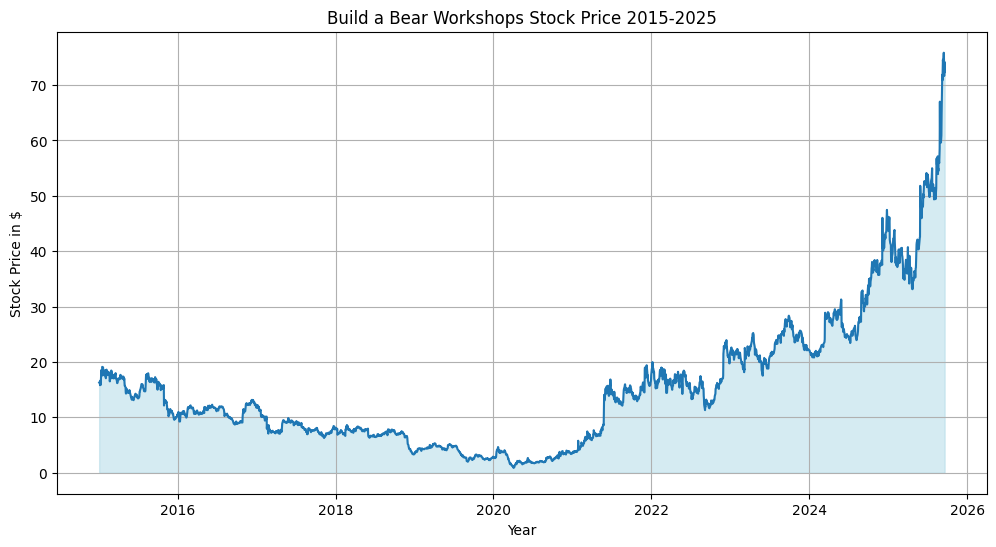

In [6]:
plt.clf()
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Stock Price in $")
plt.title("Build a Bear Workshops Stock Price 2015-2025")
plt.plot(bbw_data)
plt.fill_between(bbw_data.index, bbw_data.values.ravel(), color='lightblue', alpha=0.5)
plt.show()

During 2019 and 2020, Build a Bear's stock was performing pretty poorly. The business was facing economic pressure between the rise of Amazon's overpowering presence in the retail space, as well as the burden of the COVID-19 Pandemic, which brought the stock price as low as **$2.39** at the start of October 2020. **May 2021** marks the start of an incredible recovery period. 

This likely coincides with the reopening of malls in the later part of the COVID pandemic, but the consistent growth afterwards shows that **there is more going on than just recovery.**

Correlation: 0.8328155227802756


c:\Users\casey\OneDrive\Documents\Visual Studio Code Python\Build a Bear vs Tech Companies\.venv\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


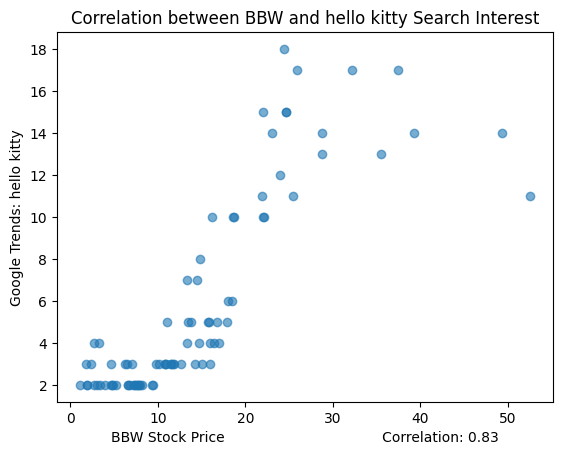

Correlation: 0.5278321956468235


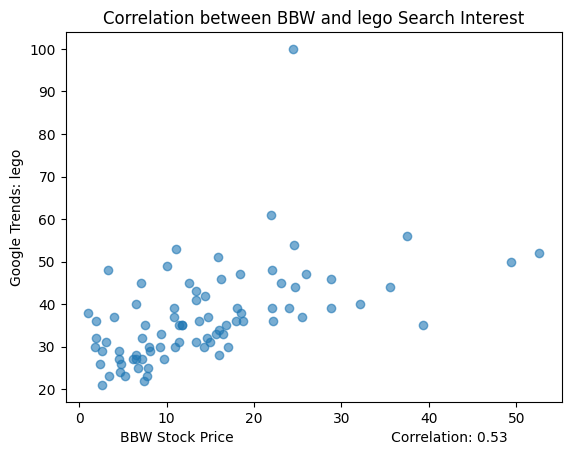

Correlation: 0.5880820322764069


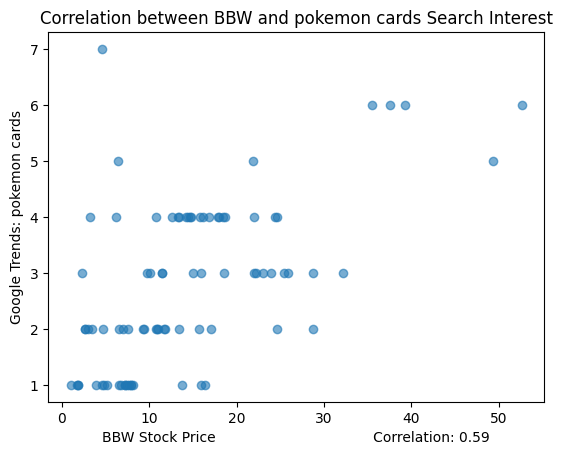

Correlation: 0.34479250273054884


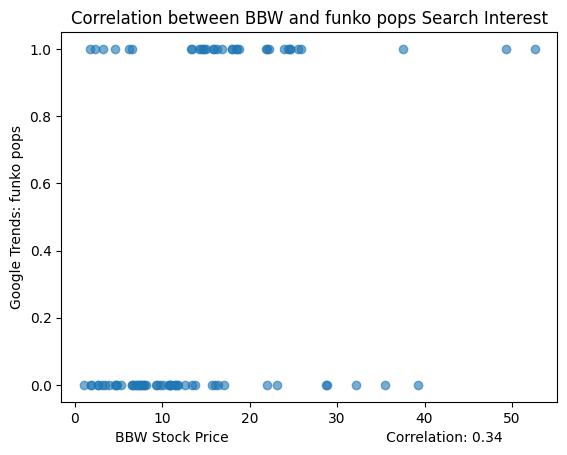

Correlation: 0.8075489127769624


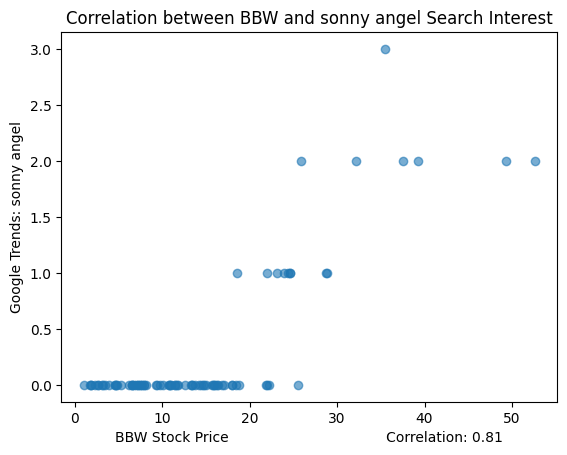

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))

kw_list = ["pokemon cards",
           "funko pops",
           "lego",
           "hello kitty",
           "sonny angel"]

pytrends.build_payload(kw_list, cat=0, timeframe='2015-01-01 2025-09-18', geo='US', gprop='') # 2013-2025 in the US

iot = pytrends.interest_over_time()
#iot.plot()

def create_scatter(key_word):
    plt.clf()
    combined = pd.concat([bbw_data, iot[key_word]], axis=1).dropna()
    combined.columns = [key_word, "BBW"]
    plt.scatter(combined[key_word], combined["BBW"], alpha=0.6)
    plt.ylabel(f"Google Trends: {key_word}")
    plt.xlabel("BBW Stock Price")
    plt.title(f"Correlation between BBW and {key_word} Search Interest") 
    plt.text(0.95, 0.95, f'Correlation: {combined.corr().iloc[0,1]:.2f}')
    print("Correlation:", combined.corr().iloc[0,1])
    plt.show()

create_scatter("hello kitty")
create_scatter("lego")
create_scatter("pokemon cards")
create_scatter("funko pops")
create_scatter("sonny angel")


#plt.clf()
#combined = pd.concat([bbw_data, iot["hello kitty"]], axis=1).dropna()
#combined.columns = ["Pokemon", "BBW"]

#plt.scatter(combined["Pokemon"], combined["BBW"], alpha=0.6)
#plt.ylabel("Google Trends: Pokemon Cards")
#plt.xlabel("BBW Stock Price")
#plt.title("Correlation between BBW and Pokemon Cards Search Interest") 

# Correlation coefficient
#print("Correlation:", combined.corr().iloc[0,1])
#plt.show()